### Class Relationships

- Aggregation
- Inheritance

### Aggregation(Has-A relationship)

One class (owner) owns the other class (property)

In [2]:
# example
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.city,self.address.pin,self.address.state)

class Address:

  def __init__(self,city,pin,state):
      self.city = city
      self.pin = pin
      self.state = state

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

gurgaon 122011 haryana


In [3]:
# If we have private variable in Address class then we cannot it outside the same class
# example
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.__city,self.address.pin,self.address.state)

class Address:

  def __init__(self,city,pin,state):
      self.__city = city
      self.pin = pin
      self.state = state

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

AttributeError: 'Address' object has no attribute '_Customer__city'

We cannot access private variable while we are performing aggregation.

So to access private variable we have to create a get method inside Address class.

In [6]:
# example
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address.get_city(),self.address.pin,self.address.state)

class Address:

  def __init__(self,city,pin,state):
      self.__city = city
      self.pin = pin
      self.state = state

  def get_city(self):
    return self.__city


add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

gurgaon 122011 haryana


## So the rule is even if a class owns another class (aggregation) still he cannot access private variables of its property class.

In [7]:
# example
class Customer:

  def __init__(self,name,gender,address):
    self.name = name
    self.gender = gender
    self.address = address

  def print_address(self):
    print(self.address._Address__city,self.address.pin,self.address.state)

  def edit_profile(self,new_name,new_city,new_pin,new_state):
    self.name = new_name
    self.address.edit_address(new_city,new_pin,new_state)

class Address:

  def __init__(self,city,pin,state):
      self.__city = city
      self.pin = pin
      self.state = state

  def get_city(self):
    return self.__city

  def edit_address(self,new_city,new_pin,new_state):
    self.__city = new_city
    self.pin = new_pin
    self.state = new_state

add1 = Address('gurgaon',122011,'haryana')
cust = Customer('nitish','male',add1)

cust.print_address()

cust.edit_profile('ankit','mumbai',111111,'maharastra')
cust.print_address()
# method example
# what about private attribute

gurgaon 122011 haryana
mumbai 111111 maharastra


# So aggregation means while creating object of a class, we are sending object of another class as a argument. That'how one class owns another class.

### Aggregation class diagram

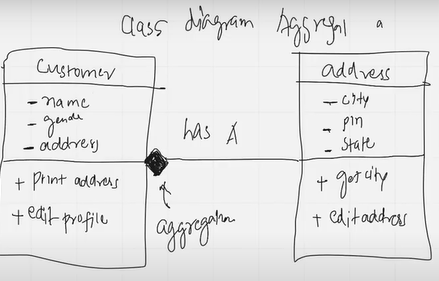

### Inheritance

- What is inheritance
- Example
- What gets inherited?

# Inheritance and it's benefits
1) Code reducability

One Programming principle is : DRY (Dont repeat yourself)

Using inheritance we follow this principle pretty well.

In [8]:

# parent
class User:

  def __init__(self):
    self.name = 'nitish'
    self.gender = 'male'

  def login(self):
    print('login')

# child
class Student(User):

  def __init__(self):
    self.rollno = 100

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
print(s.login())
print(s.enroll())

AttributeError: 'Student' object has no attribute 'name'

## This is showing this error and unable to access parent property because of method overriding.

In [9]:
# Example

# parent
class User:

  def __init__(self):
    self.name = 'nitish'
    self.gender = 'male'

  def login(self):
    print('login')

# child
class Student(User):

  def enroll(self):
    print('enroll into the course')

u = User()
s = Student()

print(s.name)
s.login()
s.enroll()

nitish
login
enroll into the course


# Class diagram

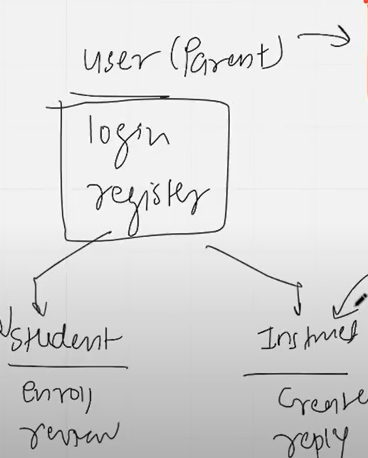

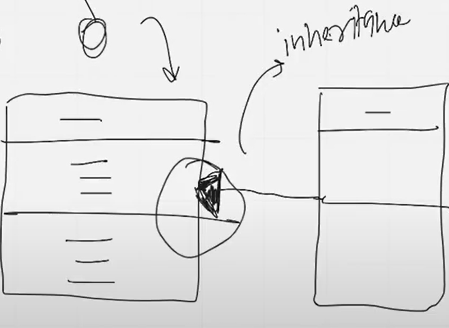

##### What gets inherited?

- Constructor
- Non Private Attributes
- Non Private Methods

# We can call the constructor of parent to initialize the attributes of parent class using only in 2 methods:

1) If child class does not contain any constructor then because of method overriding constructor of parent will be called.

2) Using super keyword inside constructor of child class.

In [ ]:
# constructor example

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 13)  # If child class does not have a constructor then parent constructor gets called.
s.buy() # we can access non private method of parent

Inside phone constructor
Buying a phone


In [17]:
# child can't access private members of the class

class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def __show(self):
        print (self.__price)

class SmartPhone(Phone):
    def check(self):
        print(self.__price)

s=SmartPhone(20000, "Apple", 13)
print(s.brand)
print(s.__price)

Inside phone constructor
Apple


AttributeError: 'SmartPhone' object has no attribute '__price'

In [18]:
s.__show()

AttributeError: 'SmartPhone' object has no attribute '__show'

# Python does not have protected keyword.

In [ ]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def show(self):
        print("This is in child class")

son=Child(100)
print(son.get_num())  # we can access a private value from parent class using a getter
son.show()

100
This is in child class


In [ ]:
class Parent:

    def __init__(self,num):
        self.__num=num

    def get_num(self):
        return self.__num

class Child(Parent):

    def __init__(self,val,num):
        self.__val=val

    def get_val(self):
        return self.__val

son=Child(100,10)
print("Parent: Num:",son.get_num()) # parent constructor never gets called
print("Child: Val:",son.get_val())

AttributeError: ignored

In [19]:
class A:
    def __init__(self):
        self.var1=100

    def display1(self,var1):
        # self.var1=var1  if we do this then only both value become equal
        print("class A :", self.var1) # this parametric var1 and self.var1 both are different
class B(A):

    def display2(self,var1):
        print("class B :", self.var1)

obj=B()
obj.display1(200)

class A : 100


In [22]:
# Method Overriding : if same method is written in parent and child then child method will get executed
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)

s.buy()
p=Phone(10000,"Samsung",12)
p.buy() # if we are calling parent buy method using parent object

Inside phone constructor
Buying a smartphone
Inside phone constructor
Buying a phone


### Super Keyword

In [ ]:
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        # syntax to call parent's buy method
        super().buy()

s=SmartPhone(20000, "Apple", 13)

s.buy()

Inside phone constructor
Buying a smartphone
Buying a phone


In [24]:
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")

s=SmartPhone(20000, "Apple", 13)
s.super().buy() # we cannot write super keyword outside a class
# generally we write super keyword inside a child class

Inside phone constructor


AttributeError: 'SmartPhone' object has no attribute 'super'

In [ ]:
# can super access parent's data?
# using super outside the class
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    def buy(self):
        print ("Buying a smartphone")
        print(super().brand) # calling parent brand variable

s=SmartPhone(20000, "Apple", 13)
s.buy()

Inside phone constructor
Buying a smartphone


AttributeError: ignored

## About Super
### Super cannot access parent variable (it can only access methods)
### Super cannot be used outside the class
### super can only be use inside a child class

In [ ]:
# super -> constuctor
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

class SmartPhone(Phone):
    def __init__(self, price, brand, camera, os, ram):
        print('Inside smartphone constructor')
        super().__init__(price, brand, camera) # always write super before initialising child variables
        self.os = os
        self.ram = ram
        print ("Inside smartphone constructor")

s=SmartPhone(20000, "Samsung", 12, "Android", 2)

print(s.os)
print(s.brand)

Inside smartphone constructor
Inside phone constructor
Inside smartphone constructor
Android
Samsung


## Inheritance in summary

- A class can inherit from another class.

- Inheritance improves code reuse

- Constructor, attributes, methods get inherited to the child class

- The parent has no access to the child class

- Private properties of parent are not accessible directly in child class

- Child class can override the attributes or methods. This is called method overriding

- super() is an inbuilt function which is used to invoke the parent class methods and constructor

In [ ]:
class Parent:

    def __init__(self,num):
      self.__num=num

    def get_num(self):
      return self.__num

class Child(Parent):

    def __init__(self,num,val):
      super().__init__(num)
      self.__val=val

    def get_val(self):
      return self.__val

son=Child(100,200)
print(son.get_num())
print(son.get_val())

100
200


In [ ]:
class Parent:
    def __init__(self):
        self.num=100

class Child(Parent):

    def __init__(self):
        super().__init__()
        self.var=200

    def show(self): # son and self both are same in this child class (so if son can access num then self can also access it)
        print(self.num)
        print(self.var)

son=Child()
son.show()

100
200


In [26]:
class Parent:
    def __init__(self):
        self.__num=100

    def show(self):
        print("Parent:",self.__num)

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.__var=10

    def show(self):
        print("Child:",self.__var)

obj=Child()
obj.show()

Child: 10


### Types of Inheritance

- Single Inheritance
- Multilevel Inheritance
- Hierarchical Inheritance
- Multiple Inheritance(Diamond Problem)
- Hybrid Inheritance

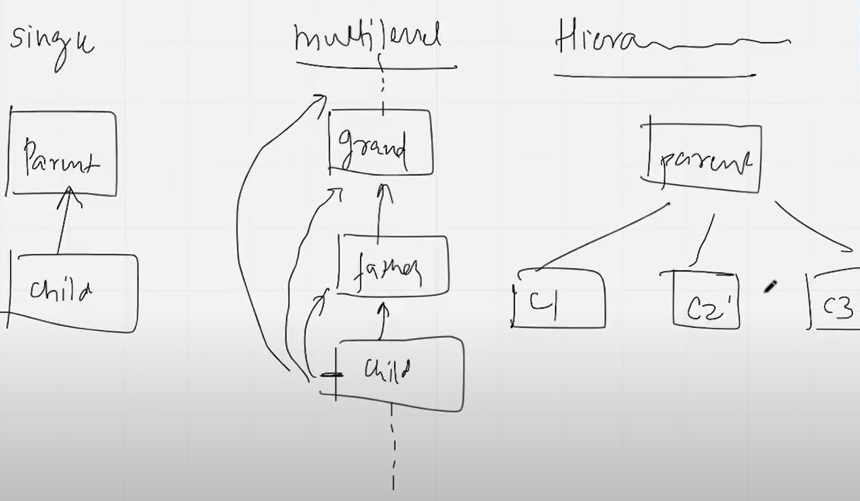

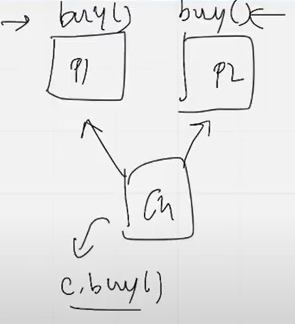

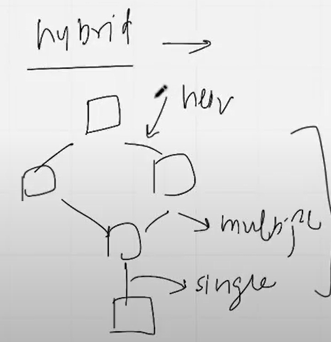

In [ ]:
# single inheritance
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()

Inside phone constructor
Buying a phone


In [ ]:
# multilevel
class Product:
    def review(self):
        print ("Product customer review")

class Phone(Product):
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()

Inside phone constructor
Buying a phone
Product customer review


In [ ]:
# Hierarchical
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class SmartPhone(Phone):
    pass

class FeaturePhone(Phone):
    pass

SmartPhone(1000,"Apple","13px").buy()
FeaturePhone(10,"Lava","1px").buy()

Inside phone constructor
Buying a phone
Inside phone constructor
Buying a phone


In [ ]:
# Multiple
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def review(self):
        print ("Customer review")

class SmartPhone(Phone, Product):
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()
s.review()


Inside phone constructor
Buying a phone
Customer review


In [ ]:
# the diamond problem
# https://stackoverflow.com/questions/56361048/what-is-the-diamond-problem-in-python-and-why-its-not-appear-in-python2
class Phone:
    def __init__(self, price, brand, camera):
        print ("Inside phone constructor")
        self.__price = price
        self.brand = brand
        self.camera = camera

    def buy(self):
        print ("Buying a phone")

class Product:
    def buy(self):
        print ("Product buy method")

# Method resolution order (MRO) phone has higher priority than product
class SmartPhone(Phone,Product): # whichever parent class name is written first their buy method will call (other class buy method will not call)
    pass

s=SmartPhone(20000, "Apple", 12)

s.buy()

Inside phone constructor
Buying a phone


In [ ]:
class A:

    def m1(self): # if no parent class contains a constructor then object class (Every class by default inherit this class) constructor will get call.
        return 20

class B(A):

    def m1(self):
        return 30

    def m2(self):
        return 40

class C(B):

    def m2(self):
        return 20
obj1=A()
obj2=B()
obj3=C()
print(obj1.m1() + obj3.m1()+ obj3.m2())

70


In [ ]:
class A:

    def m1(self):
        return 20

class B(A):

    def m1(self):
        val=super().m1()+30
        return val

class C(B):

    def m1(self):
        val=self.m1()+20  # because of method overridding parent m1 will never be call
        return val
obj=C()
print(obj.m1())

RecursionError: ignored

## Polymorphism

- Method Overriding : Child class method will execute rather than parent method if both have same name

- Method Overloading : A method will give different output based on different input but the name and return type will be same

- Operator Overloading : Behaviour of a operator becomes different based on different input

Using Method Overloading code looks much cleaner.

## But in python below way of doing method overloading is not allowed.

In [27]:
class Shape:

  def area(self,radius):
    return 3.14*radius*radius

  def area(self,length,breadth): # python will considered the latest method formed thatswhy giving this error
    return length*breadth

s = Shape()

print(s.area(2))
print(s.area(3,4))

TypeError: Shape.area() missing 1 required positional argument: 'breadth'

## Method Overloading

In [ ]:
class Shape:

  def area(self,a,b=0): # to impliment method overloading functionality we will use default arguments
    if b == 0:
      return 3.14*a*a
    else:
      return a*b

s = Shape()

print(s.area(2))
print(s.area(3,4))

12.56
12


# Operator Overloading

In [ ]:
'hello' + 'world' # cancatination

'helloworld'

In [ ]:
4 + 5 # addition

9

In [ ]:
[1,2,3] + [4,5] # merging

[1, 2, 3, 4, 5]

## Previously we have seen + operator used in __Add__ dunder method and it is also a example of operator overloading.

# Abstraction
Abstract method contains atleast 1 abstract method.

Abstract method does not contain any body or content. Concreate method have a body inside a method.

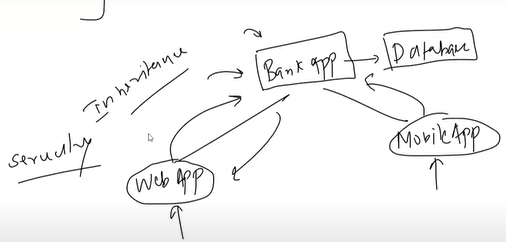

In [28]:
# 2 condition for abstract class : inherit ABC class and should contain atleast 1 abstract method
from abc import ABC,abstractmethod
class BankApp(ABC):

  def database(self):
    print('connected to database')

  @abstractmethod
  def security(self):
    pass

  @abstractmethod
  def display(self):
    pass


In [29]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

In [31]:
mob = MobileApp() # cannot inherit until it implement abstract method

TypeError: Can't instantiate abstract class MobileApp with abstract methods display, security

In [32]:
class MobileApp(BankApp):

  def mobile_login(self):
    print('login into mobile')

  def security(self):
    print('mobile security')

  def display(self):
    print('display')

In [33]:
mob = MobileApp()

In [34]:
mob.database() # now it can access database

connected to database


In [ ]:
# We cannot create object of a abstract class
obj = BankApp()

TypeError: ignored